In [2]:
from google.colab import files
uploaded=files.upload()

Saving epa-sea-level.txt to epa-sea-level.txt


In [22]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df=pd.read_csv(io.BytesIO(uploaded['epa-sea-level.txt']))



,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [50]:

df1=np.arange(2014,2051)
df1=pd.Series(df1)
df2=df['Year'].append(df1,ignore_index=True)  #adding year till 2050

df2000=df[df["Year"]>=2000]
df2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


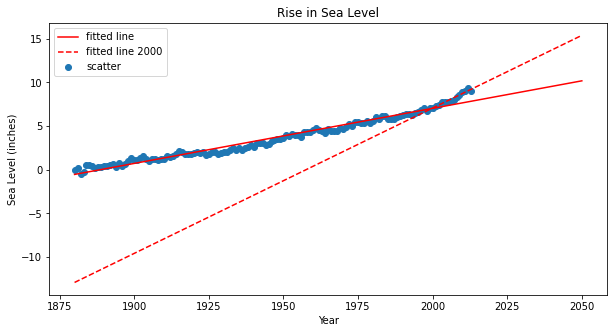

In [55]:
fig,ax=plt.subplots(figsize=(10,5))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'],label='scatter')
res=stats.linregress(df['Year'],df['CSIRO Adjusted Sea Level'])
res2000=stats.linregress(df2000['Year'],df2000['CSIRO Adjusted Sea Level'])
plt.plot(df2, res.intercept + res.slope*df2, 'r', label='fitted line')
plt.plot(df2, res2000.intercept + res2000.slope*df2, 'r--', label='fitted line 2000')
# plt.xticks([1880,1900,1920,1940,1960,1980,2000,2020,2040,2050])
plt.title("Rise in Sea Level")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()
plt.show()